In [65]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv


load_dotenv()


generation_prompt = ChatPromptTemplate.from_messages(
   [
       (
        "system", "You are a twitter techie influencer assitance tasked with writing excellent twitter post"
         "Generate the best twitter post possible for the user's request."
        "If the user provides citiques, respond with a revised version of your previous attempts"
       ),
       MessagesPlaceholder(variable_name="messages")
   ]
)

reflection_prompt = ChatPromptTemplate.from_messages(
    [
        (
        "system",  "You are a viral twitter influcer grading a tweet. Generate critique and recommendation for the user's tweet"
        "Always provide detailed recommendations, including request for length, virality, style, etc",
       ),

        MessagesPlaceholder(variable_name="messages")
    ],

)



In [66]:
llm =  ChatGoogleGenerativeAI(model='gemini-2.5-flash-preview-05-20')

generation_chain = generation_prompt | llm
reflection_chain = reflection_prompt | llm

In [7]:
response = generation_chain.invoke(["write a tweet about Lagos hustle"])
content = response.content
print(content)

Here's a tweet capturing the Lagos hustle vibe!

---

That Lagos hustle isn't just a grind, it's an *art form*! 🎨 From navigating the relentless traffic to seizing every opportunity, this city demands your absolute best and shapes you into something unstoppable. It's chaotic, it's relentless, but oh-so-rewarding. Only the strong survive & thrive here!

What's your Lagos hustle secret? 👇

#Lagos #Hustle #CityOfChampions #MadeInLagos #Grind


In [9]:
resp = reflection_chain.invoke([content])
print(resp.content)

Alright, fam! Let's dissect this Lagos hustle tweet. You've tapped into a *goldmine* of emotion and relatability here. The energy is there, the passion is evident, and you're speaking to a very specific, proud community.

But are we going viral? Are we making the *entire internet* feel the heat of Lagos? We can always level up!

---

### **Viral Influencer Grade: B+**

**What You NAILED 🎯**

1.  **The Hook:** "It's an *art form*! 🎨" - YES! This is a fantastic, fresh take on the hustle. It immediately elevates the conversation from just "grind" to something more profound and visually appealing.
2.  **Emotional Connection:** You perfectly capture the essence – "chaotic, relentless, but oh-so-rewarding." Anyone who knows Lagos will nod their head.
3.  **Strong Call to Action (CTA):** "What's your Lagos hustle secret? 👇" - This is direct, inviting, and encourages replies. The emoji works.
4.  **Relevant Hashtags:** #Lagos #Hustle #CityOfChampions #MadeInLagos #Grind - All on point, discove

In [67]:
from langgraph.graph import MessageGraph, END, START
from typing import Sequence, List
from langchain_core.messages import BaseMessage, HumanMessage

graph = MessageGraph()
REFLECT= "reflection"
GENERATE="generation"

def reflect_node(state):
    return reflection_chain.invoke({
        "messages":state
    })

def generate_node(state):
    
    response =  generation_chain.invoke({
        "messages":state
    })

    return  [HumanMessage(content=response.content)]

def should_continue(state):
    # print(f"Deciding on state length: {len(state)}")
    if (len(state)>2):
        return "end"
    return "reflect"




graph.add_node(GENERATE, generate_node)
graph.add_node(REFLECT, reflect_node)

 
graph.set_entry_point(GENERATE)
graph.add_conditional_edges(GENERATE, should_continue, {"end":END, "reflect":REFLECT})
graph.add_edge(REFLECT, GENERATE)

# graph.add_conditional_edges(GENERATE, should_continue)
# graph.add_edge(REFLECT, GENERATE)


app = graph.compile()



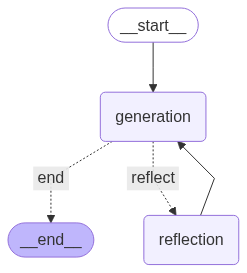

In [68]:
app 

In [69]:
response = app.invoke(HumanMessage(content="write a tweet about Lagos Hustle"))
print(response)

[HumanMessage(content='write a tweet about Lagos Hustle', additional_kwargs={}, response_metadata={}, id='bb99fd01-0abb-4fe4-bf4b-c72a0b08031f'), HumanMessage(content="That Lagos energy hits different! 😤 From the early morning grind to late-night brainstorms, the #LagosHustle is a masterclass in resilience & relentless ambition. It's tough, but it shapes you.\n\nWhat's your biggest lesson from the Lagos grind? 👇 #TechInLagos #Nigeria", additional_kwargs={}, response_metadata={}, id='60aa081f-104c-483d-916e-1c883bc38514'), AIMessage(content='Alright, let\'s break this down, fam! You\'re talking Lagos, you\'re talking hustle, you\'re tapping into a GOLDMINE of relatable content. But are you *crushing* it or just *coasting*? Let\'s see.\n\n---\n\n### **Your Tweet: "That Lagos energy hits different! 😤 From the early morning grind to late-night brainstorms, the #LagosHustle is a masterclass in resilience & relentless ambition. It\'s tough, but it shapes you. What\'s your biggest lesson from

In [74]:
for msg in  response:
    print(msg.content)
    print("*"*120)

write a tweet about Lagos Hustle
************************************************************************************************************************
That Lagos energy hits different! 😤 From the early morning grind to late-night brainstorms, the #LagosHustle is a masterclass in resilience & relentless ambition. It's tough, but it shapes you.

What's your biggest lesson from the Lagos grind? 👇 #TechInLagos #Nigeria
************************************************************************************************************************
Alright, let's break this down, fam! You're talking Lagos, you're talking hustle, you're tapping into a GOLDMINE of relatable content. But are you *crushing* it or just *coasting*? Let's see.

---

### **Your Tweet: "That Lagos energy hits different! 😤 From the early morning grind to late-night brainstorms, the #LagosHustle is a masterclass in resilience & relentless ambition. It's tough, but it shapes you. What's your biggest lesson from the Lagos grin